## Introduction

For this week, we will use some generated data to practice your ML skills.  The data simulates customer purchase behavior across different product categories.  Your job is to predict the target classes with a classifier.

__Target Classes:__ 5 product categories (Electronics, Clothing, Home & Garden, Beauty, Sports & Outdoors).

__Features:__

- Age: Numeric, representing the age of the customer.
- Income: Numeric, representing the yearly income of the customer.
- Gender: Categorical, male or female.
- Membership_Duration: Numeric, years of being a member of the online store.
- Shopping_Frequency: Categorical, frequency of shopping (Weekly, Monthly, Rarely).
- Last_Purchase_Amount: Numeric, amount spent in the last purchase.

The data can be found in `./data/purchase_data.csv`.

#### __Exercise 1__
<!-- @q -->

Inspect the data - does it have any nulls?  Outliers?  Use a scatter matrix to visualize the numeric data, and examine histograms for the categorical data.

First load the data and look for nulls.

In [13]:
# Your code here
import pandas as pd
import os
print(os.getcwd())

# Load dataset
df = pd.read_csv("data/purchase_data.csv")   

# Preview data
print("descriptive analysis")
#print(df.head())
#print(df.info())
#print(df.describe(include="all"))
# Add extra metrics
summary = df.describe(include="all").transpose()
summary["dtype"] = df.dtypes
summary["skew"] = df.skew(numeric_only=True)
print(summary)

# Count nulls per column
print(df.isnull().sum())
# Percentage of missing values
print(df.isnull().mean() * 100)


/workspaces/week-3-materials-0223josie
descriptive analysis
                       count unique                top freq        mean  \
Unnamed: 0            1000.0    NaN                NaN  NaN       499.5   
Age                    900.0    NaN                NaN  NaN   34.555556   
Income                 900.0    NaN                NaN  NaN    50005.57   
Gender                  1000      2               Male  518         NaN   
Membership_Duration   1000.0    NaN                NaN  NaN        5.69   
Shopping_Frequency      1000      3            Monthly  337         NaN   
Last_Purchase_Amount   900.0    NaN                NaN  NaN  293.539618   
Product_Category        1000      4  Sports & Outdoors  871         NaN   

                              std        min        25%         50%  \
Unnamed: 0             288.819436        0.0     249.75       499.5   
Age                      9.816686        2.0       28.0        35.0   
Income                19962.57447    30099.0   3563

In [14]:
# Check for Outliers (using IQR method)
import numpy as np

# Simple outlier detection for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(outliers[[col]])
    print(f"{col}: {len(outliers)} outliers")


Empty DataFrame
Columns: [Unnamed: 0]
Index: []
Unnamed: 0: 0 outliers
      Age
74    8.0
179  62.0
209  73.0
262   2.0
646   8.0
668   8.0
755  61.0
Age: 7 outliers
       Income
37   142172.0
52   117881.0
86    99743.0
92   100012.0
129   97116.0
131   90652.0
144  100072.0
168  178834.0
170  105597.0
216   92255.0
254   90484.0
288  118102.0
320  132789.0
327   93224.0
342  127813.0
368  126965.0
385  104271.0
402   95999.0
404   97523.0
419  135438.0
422  112305.0
431  144257.0
458  104489.0
460   94166.0
477   92171.0
504   92700.0
519   98753.0
531   99148.0
534  108210.0
568  113558.0
593  126096.0
610   93436.0
616  142174.0
658  158109.0
700   92752.0
724   96151.0
731  109581.0
737  101514.0
782  113980.0
795   96751.0
813  112113.0
826   98301.0
828  112841.0
904  105272.0
947  137797.0
978   90128.0
990  101179.0
Income: 47 outliers
     Membership_Duration
14                    18
154                   20
173                   27
193                   21
198             

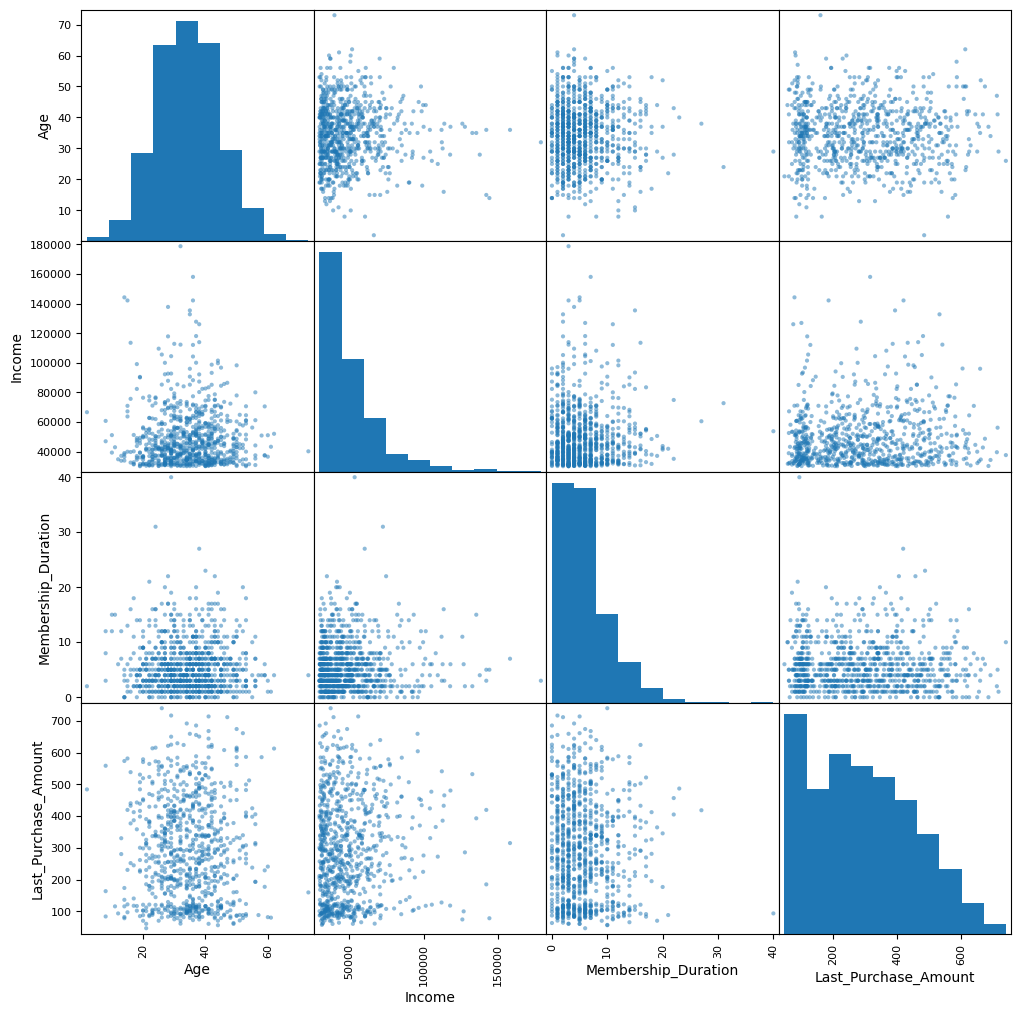

In [15]:
# Your code here
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Scatter matrix
scatter_matrix(df[["Age","Income","Membership_Duration","Last_Purchase_Amount"]], figsize=(12, 12), diagonal='hist')
plt.show()


Now plot a bar graph to look at product counts.

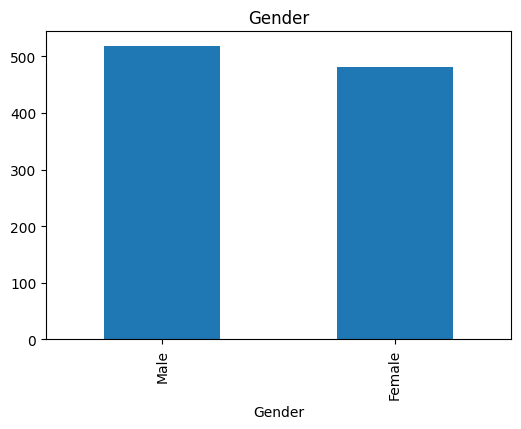

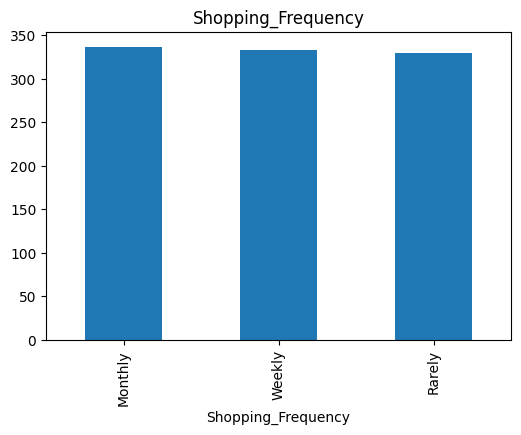

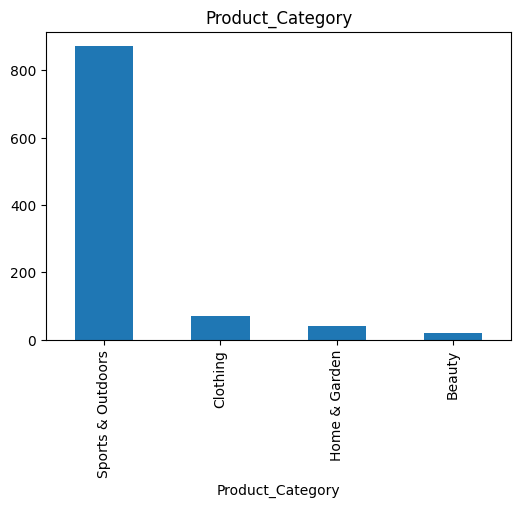

In [16]:
# Your code here
import matplotlib.pyplot as plt

categorical_cols = ["Gender", "Shopping_Frequency", "Product_Category"]

# One-hot encode (ML-ready version)
df_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
#print(df_dummies.head())

# Plot the original categorical distributions
for col in categorical_cols:
    df[col].value_counts().plot(kind="bar", figsize=(6,4), title=col)
    plt.show()

#### __Exercise 2__
<!-- @q -->

Impute your missing data! Use whatever methods you want.  Make sure to check to see that you've eliminated nulls.

In [17]:
# Your code here
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# 1) SimpleImputer for Age
age_imputer = SimpleImputer(strategy="median")
df["Age"] = age_imputer.fit_transform(df[["Age"]])

# 2) KNNImputer for Last_Purchase_Amount and Income
knn_imputer = KNNImputer(n_neighbors=5)  # you can adjust neighbors
df[["Last_Purchase_Amount", "Income"]] = knn_imputer.fit_transform(
    df[["Last_Purchase_Amount", "Income"]]
)

# 3) Verify nulls are gone
print(df.isnull().sum())

output_path = "imputed_dataset.csv"
df.to_csv(output_path, index=False)
print(f"✅ Imputed dataset saved as {output_path}")

Unnamed: 0              0
Age                     0
Income                  0
Gender                  0
Membership_Duration     0
Shopping_Frequency      0
Last_Purchase_Amount    0
Product_Category        0
dtype: int64
✅ Imputed dataset saved as imputed_dataset.csv


#### __Exercise 3__

<!-- @q -->

Encode your data properly (one-hot encode for features, label encode for targets) and scale your numeric features using a standard scaler.

X_train_prepared shape: (800, 9)
X_test_prepared shape: (200, 9)
y classes -> ints: {'Beauty': 0, 'Clothing': 1, 'Home & Garden': 2, 'Sports & Outdoors': 3}


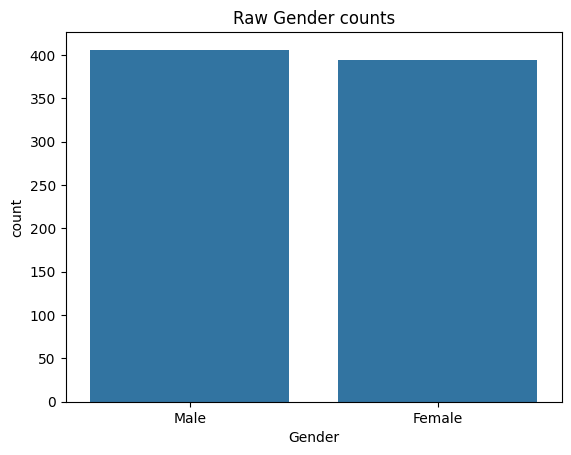

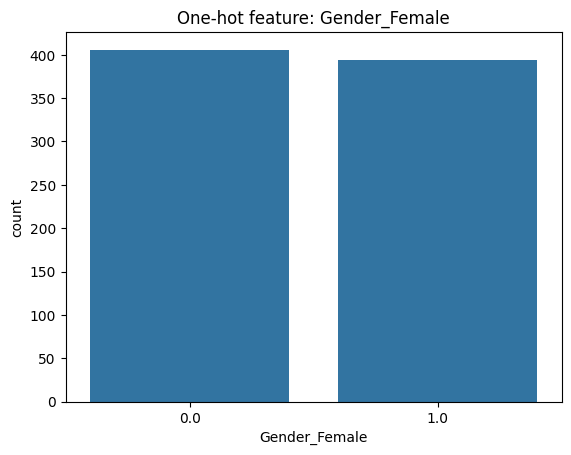

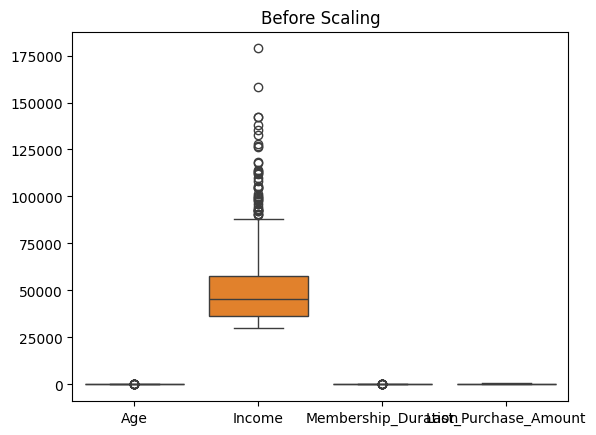

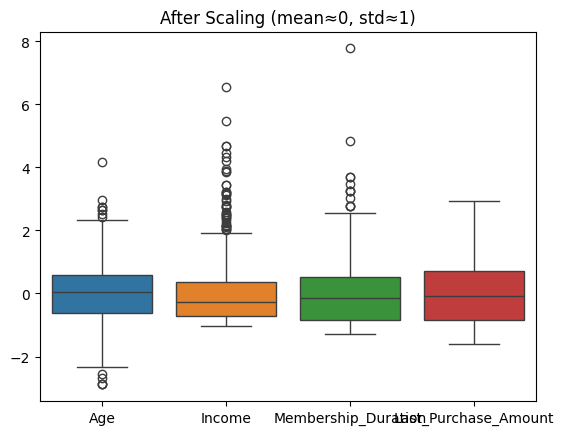

'\n# Create the encoder\nencoder = OneHotEncoder(sparse_output=False)\n\n# Fit and transform the categorical columns\nencoded_array = encoder.fit_transform(df[categorical_cols])\n\n# Convert to DataFrame with proper column names\nencoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))\n\n# Combine with the numeric column(s)\nfinal_df = pd.concat([encoded_df, df[[TARGET]].reset_index(drop=True)], axis=1)\n\nprint("Final_DF")\nprint(final_df)\n\n# ---------------------------\n# 3) Build preprocessors\n#    - Categorical: impute most_frequent, then one-hot with fixed categories\n#    - Numeric: impute median, then StandardScaler\n# ---------------------------\nscaler = StandardScaler()\n\n# --- Build preprocessing for features ---\n# Impute then scale numerics; impute then one-hot encode categoricals\nnumeric_pipe = Pipeline([\n    ("imputer", SimpleImputer(strategy="median")),\n    ("scaler", StandardScaler()),\n])\n\ncategorical_pipe = Pipeline(

In [ ]:
# Your code here
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv("imputed_dataset.csv") 

categorical_cols = ["Gender", "Shopping_Frequency"]
# Example numeric columns (edit as needed)
numeric_cols = ["Age", "Income", "Membership_Duration", "Last_Purchase_Amount"]

TARGET = "Product_Category"  # replace with your real target

X = df[categorical_cols + numeric_cols].copy()
y = df[TARGET].copy()

# ---- Train/Test split FIRST (avoid leakage) ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Label-encode the TARGET ----
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# ---- Build preprocessing for X ----
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # use sparse=False on older sklearn
])

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocess = ColumnTransformer([
    ("cat", cat_pipe, categorical_cols),
    ("num", num_pipe, numeric_cols),
])

# ---- Fit on train only, transform both ----
X_train_prepared = preprocess.fit_transform(X_train)
X_test_prepared  = preprocess.transform(X_test)

print("X_train_prepared shape:", X_train_prepared.shape)
print("X_test_prepared shape:", X_test_prepared.shape)
print("y classes -> ints:", dict(zip(le.classes_, range(len(le.classes_)))))

# Sanity Check Plots
import matplotlib.pyplot as plt
import seaborn as sns

# --- Build feature names manually ---
# Get the fitted onehot encoder
ohe = preprocess.named_transformers_["cat"]["onehot"]

# One-hot expanded names
cat_feature_names = ohe.get_feature_names_out(categorical_cols)

# Numeric names (unchanged)
num_feature_names = numeric_cols

# Combine
all_feature_names = list(cat_feature_names) + num_feature_names

sns.countplot(x=X_train["Gender"])
plt.title("Raw Gender counts")
plt.show()

# After encoding (one-hot expanded, just spot checking with Gender)
import pandas as pd
X_train_encoded_df = pd.DataFrame(
    preprocess.transform(X_train), columns=all_feature_names
)
sns.countplot(x="Gender_Female", data=X_train_encoded_df)
plt.title("One-hot feature: Gender_Female")
plt.show()

# Box Plot Before Scaling
sns.boxplot(data=X_train[numeric_cols])
plt.title("Before Scaling")
plt.show()

# Box Plote After Scaling
sns.boxplot(data=pd.DataFrame(X_train_prepared, columns=all_feature_names)[numeric_cols])
plt.title("After Scaling (mean≈0, std≈1)")
plt.show()

#### __Exercise 4__

<!-- @q --> 

Note that your classes are imbalanced.  Use SMOTE to rebalance them (_HINT: import SMOTE from `imblearn.over_sampling`_)

CV F1_macro: mean=0.530, std=0.057


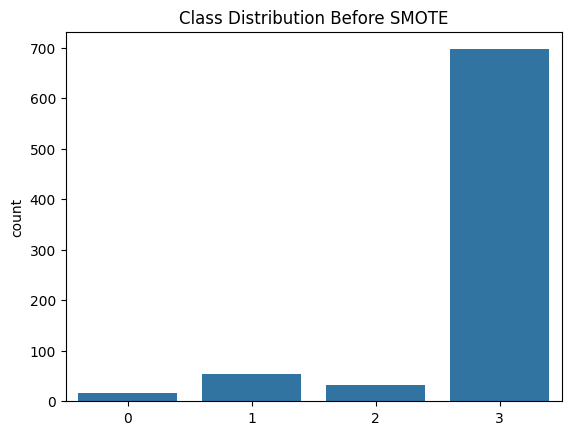

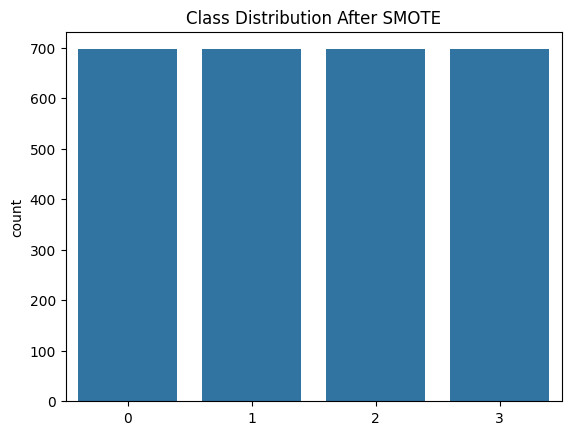

'\nimport pandas as pd\nimport numpy as np\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler, LabelEncoder\nfrom sklearn.metrics import classification_report\nfrom sklearn.linear_model import LogisticRegression\nfrom collections import Counter\n\nfrom imblearn.over_sampling import SMOTE\nfrom imblearn.pipeline import Pipeline as ImbPipeline  # important: imblearn\'s Pipeline\n\n# --- 1) Columns ---\nnumeric_cols = ["Age", "Income", "Membership_Duration"]\nTARGET = "Last_Purchase_Amount"  \n\n# --- 2) Split features/target ---\nX = df[numeric_cols].copy()\ny = df[TARGET].copy()\n\n# If y is categorical strings, encode to ints\nif y.dtype == "object":\n    y = LabelEncoder().fit_transform(y)\n\n# --- 3) Train/test split (SMOTE only on train) ---\nX_train, X_test, y_train, y_test = train_test_split(\n    X, y, test_size=0.2, stratify=y, random_state=42\n)\n\nprint("Class counts before SMOTE (train):", Counter(y_train))\n\n# --- 4) Bu

In [ ]:
# Your code here
#%pip install imbalanced-learn
# pip install imbalanced-learn

import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Variables from previous exercise:
df = pd.read_csv("imputed_dataset.csv") 
categorical_cols = ["Gender", "Shopping_Frequency"]
numeric_cols = ["Age", "Income", "Membership_Duration", "Last_Purchase_Amount"]
preprocess = ColumnTransformer([
    ("cat", cat_pipe, categorical_cols),
    ("num", num_pipe, numeric_cols),
])
TARGET = "Product_Category"  # replace with your real target

X = df[categorical_cols + numeric_cols].copy()
y = df[TARGET].copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% test split
    random_state=42,        # reproducible split
    stratify=y              # keeps class proportions
)
le = LabelEncoder(); y_train_enc = le.fit_transform(y_train); y_test_enc = le.transform(y_test)

# ---- Build a model pipeline with SMOTE in the middle ----
clf = ImbPipeline(steps=[
    ("preprocess", preprocess),              # impute + one-hot + scale
    ("smote", SMOTE(random_state=42)),       # oversample minority classes (train folds only)
    ("model", LogisticRegression(max_iter=2000))
])

# ---- Cross-validated F1 (macro) on the *train* split (SMOTE runs inside CV folds) ----
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_train, y_train_enc, cv=cv, scoring="f1_macro")
print(f"CV F1_macro: mean={cv_scores.mean():.3f}, std={cv_scores.std():.3f}")


# Bar Plot to compare results before and after SMOTE
import seaborn as sns

# Apply preprocessing + SMOTE directly for inspection
X_train_prepared = preprocess.fit_transform(X_train)
X_sm, y_sm = SMOTE(random_state=42).fit_resample(X_train_prepared, y_train_enc)

# Before SMOTE
sns.countplot(x=y_train_enc)
plt.title("Class Distribution Before SMOTE")
plt.show()

# After SMOTE
sns.countplot(x=y_sm)
plt.title("Class Distribution After SMOTE")
plt.show()


#### __Exercise 5__

<!-- @q -->

Try modeling with a LogisticRegression.  Use cross validation to evaluate your accuracy and F1-scores for each class, as well as your average performance across all classes.

In [20]:
# Your code here
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# First need to label encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)   # <-- this is y_enc

# If you want to see the mapping:
print(dict(zip(le.classes_, range(len(le.classes_)))))

# Pipeline: preprocess -> SMOTE -> LogisticRegression
clf = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=2000, solver="lbfgs", multi_class="multinomial"))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Accuracy
acc_scores = cross_val_score(clf, X, y_enc, cv=cv, scoring="accuracy")

# F1 macro (average across classes)
f1_macro_scores = cross_val_score(clf, X, y_enc, cv=cv, scoring="f1_macro")

print("Cross-validated Accuracy: mean=%.3f, std=%.3f" % (acc_scores.mean(), acc_scores.std()))
print("Cross-validated F1-macro: mean=%.3f, std=%.3f" % (f1_macro_scores.mean(), f1_macro_scores.std()))

# labels in a fixed order so every fold lines up the same way
labels = np.arange(len(le.classes_))
fold_reports = []
for train_idx, test_idx in cv.split(X, y_enc):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_enc[train_idx], y_enc[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # dict -> DataFrame; enforce consistent rows with labels/target_names
    rep_df = pd.DataFrame(
        classification_report(
            y_test, y_pred,
            labels=labels,
            target_names=le.classes_,
            output_dict=True,
            zero_division=0
        )
    ).T
    # ✅ append the report for this fold
    fold_reports.append(rep_df)
    
# Average across folds (this stays 2-D)
avg_report = pd.concat(fold_reports, axis=0).groupby(level=0).mean()
print(avg_report)

{'Beauty': 0, 'Clothing': 1, 'Home & Garden': 2, 'Sports & Outdoors': 3}


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'm

Cross-validated Accuracy: mean=0.793, std=0.028
Cross-validated F1-macro: mean=0.435, std=0.028


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'm

                   precision    recall  f1-score  support
Beauty              0.038182  0.100000  0.055238    4.000
Clothing            0.341719  0.421978  0.373218   13.800
Home & Garden       0.268115  0.875000  0.406582    8.000
Sports & Outdoors   0.987813  0.834660  0.904461  174.200
accuracy            0.793000  0.793000  0.793000    0.793
macro avg           0.408957  0.557910  0.434875  200.000
weighted avg        0.895387  0.793000  0.830821  200.000


#### __Exercise 6__

If you've not done so already, place all of your operations in a pipeline.  Note that SMOTE requires a different pipeline class (I've included this for you - use the `make_pipeline` function.) 

In [22]:
# Note that we need to use the pipeline from IMBLearn for this to work
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate

df = pd.read_csv("data/purchase_data.csv")

# Fill in the rest of the code below - use X,y for data and pipeline as the variable for your
# pipeline

# TODO: Replace with your code (fill)
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

df = pd.read_csv("data/purchase_data.csv")

# Assume the LAST column is the target; change if your dataset differs
TARGET = df.columns[-1]
X = df.drop(columns=[TARGET])
y = df[TARGET]

# Label-encode target (good practice for imbalanced tasks + metrics)
le = LabelEncoder()
y_enc = le.fit_transform(y)

# --- preprocessing for X ---
num_sel = selector(dtype_include=["number"])
cat_sel = selector(dtype_include=["object", "category", "bool"])

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # use sparse=False if sklearn<1.2
])

preprocess = ColumnTransformer([
    ("num", num_pipe, num_sel),
    ("cat", cat_pipe, cat_sel),
])

# --- pipeline: preprocess -> SMOTE -> LogisticRegression ---
pipeline = make_pipeline(
    preprocess,
    SMOTE(random_state=42),
    LogisticRegression(max_iter=2000, solver="lbfgs", multi_class="auto")
)

# --- evaluation ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# We're using "macro" here so we can evaluate both of our classes - this is unusual for binary targets
cross_validate(pipeline,X,y,scoring=['f1_macro'])


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'm

{'fit_time': array([0.06022453, 0.06828523, 0.05487132, 0.05113101, 0.05919027]),
 'score_time': array([0.00833011, 0.00774574, 0.00773215, 0.00957203, 0.00816226]),
 'test_f1_macro': array([0.40825321, 0.54120155, 0.49661172, 0.48875826, 0.39523273])}

Now try running your model with a DecisionTreeClassifier.  Which performs better?

In [25]:
# Your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Logistic Regression pipeline
log_reg_pipe = make_pipeline(
    preprocess,
    SMOTE(random_state=42),
    LogisticRegression(max_iter=2000, solver="lbfgs", multi_class="auto", random_state=42)
)

# Decision Tree pipeline
tree_pipe = make_pipeline(
    preprocess,
    SMOTE(random_state=42),
    DecisionTreeClassifier(random_state=42)
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate Logistic Regression
log_scores = cross_validate(
    log_reg_pipe, X, y_enc, cv=cv,
    scoring=['accuracy', 'f1_macro'], return_train_score=False
)

# Evaluate Decision Tree
tree_scores = cross_validate(
    tree_pipe, X, y_enc, cv=cv,
    scoring=['accuracy', 'f1_macro'], return_train_score=False
)

print("=== Logistic Regression ===")
print(f"Accuracy : {log_scores['test_accuracy'].mean():.3f} ± {log_scores['test_accuracy'].std():.3f}")
print(f"F1-macro : {log_scores['test_f1_macro'].mean():.3f} ± {log_scores['test_f1_macro'].std():.3f}")

print("\n=== Decision Tree ===")
print(f"Accuracy : {tree_scores['test_accuracy'].mean():.3f} ± {tree_scores['test_accuracy'].std():.3f}")
print(f"F1-macro : {tree_scores['test_f1_macro'].mean():.3f} ± {tree_scores['test_f1_macro'].std():.3f}")

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'm

=== Logistic Regression ===
Accuracy : 0.799 ± 0.032
F1-macro : 0.483 ± 0.039

=== Decision Tree ===
Accuracy : 0.876 ± 0.008
F1-macro : 0.515 ± 0.026


Why do we need to use a different pipeline class when using `SMOTE`?

Sklearn only modifies the "features" and doesn't modify the "labels" the way SMOTE does.